# Programming for Data Analysis

## Project 1: Generation of data

## Author: Daniel Mc Donagh

This project will generate random Irish person data using the attributes of age, height, weight and sex. The random generated data will be based on the actual distribution of said data taken from statistical data measurements on the irish population.


In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Variables


The List of variables to be used in the datarame are 

- ID 
- Gender
- Age
- Weight
- Height

### Gender
Data taken from the central statistics office shows that since 1971 when there was an equal 50/50 split in the number of males and females in Ireland, the number of females has steadily increased such that in 2022, this had changed with females accounting for 51% of the population.(CSO 2023)


In [9]:
df = pd.DataFrame(index = None)
rng = np.random.default_rng(seed = 1)


In [10]:
person = []
for i in range (100):
    person.append ("Person {}".format(i+1))

df["person"] = person
df.head()

,person
0,Person 1
1,Person 2
2,Person 3
3,Person 4
4,Person 5


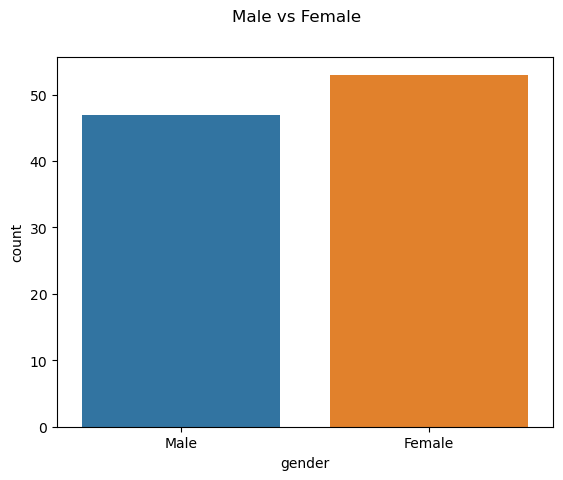

In [21]:
gender_choice = ["Male","Female"]
gender = rng.choice (gender_choice, p = [0.49, 0.51], size = 100) #(Numpy 2022)
df["gender"] = gender

# Test
sns.countplot(x = df["gender"])
plt.suptitle ("Male vs Female")
plt.show()

In [19]:
df.head


<bound method NDFrame.head of         person  gender
0     Person 1    Male
1     Person 2    Male
2     Person 3    Male
3     Person 4  Female
4     Person 5    Male
..         ...     ...
95   Person 96    Male
96   Person 97  Female
97   Person 98    Male
98   Person 99    Male
99  Person 100    Male

[100 rows x 2 columns]>

In [20]:
df["gender"]. value_counts()

Female    52
Male      48
Name: gender, dtype: int64

In [23]:
age = []
for i in range(100):
    a= np.clip(rng.normal(37.4, 15), 18, 100)
    age.append(int(a))
df["age"] = age

In [24]:
df.head()

,person,gender,age
0,Person 1,Male,46
1,Person 2,Male,18
2,Person 3,Female,36
3,Person 4,Female,33
4,Person 5,Male,38


----------

## References

(Numpy 2022)
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html

(CSO 2023)
https://www.cso.ie/en/releasesandpublications/ep/p-ieu50/irelandandtheeuat50/society/population/#:~:text=This%20represents%20a%20percentage%20increase%20of%20almost%2073%25,with%20females%20accounting%20for%2051%25%20of%20the%20population.
